In [1]:
import pandas as pd

## Modeling

In [2]:
df = pd.read_csv('featured_data.csv')

/var/folders/kj/yvh7dv5569ggqx7tcy8crpp00000gn/T/ipykernel_71279/2069542416.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('featured_data.csv')


In [43]:
df.shape

(1023552, 60)

In [45]:
df.head(2).T

,17,18
id,520288,520288
stmt_date,2011-12-31 00:00:00,2008-12-31 00:00:00
HQ_city,28.0,28.0
legal_struct,SRL,SRL
ateco_sector,14.0,14.0
def_date,NaT,NaT
fs_year,2011,2008
asst_intang_fixed,67537.0,256438.0
asst_tang_fixed,1137566.0,1181416.0
asst_fixed_fin,1908.0,860.0


In [46]:
calc_columns = ['default',
                'calculated_asst_tot',
                'liab_tot',
                'calculated_liabilities_equity',
                'asset_quantile',
                'financial_leverage',
                'financial_leverage_quantile',
                'profitability_ratio',
                'profitability_ratio_quantile',
                'net_receivables',
                'quick_ratio_v1',
                'quick_ratio_v2',
                'quick_ratio_v2_quantile',
                'cash_assets_ratio',
                'cash_assets_ratio_quantile',
                'dscr',
                'dscr_quantile']

In [52]:
df.sort_values('stmt_date', inplace=True)

In [60]:
modeling_df = df[calc_columns].copy()

In [63]:
train_df = modeling_df.iloc[:int(len(modeling_df)*0.8)]

In [66]:
test_df = modeling_df[~modeling_df.index.isin(train_df.index)]

In [68]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [74]:
feature_list = [
                'calculated_asst_tot',
                'liab_tot',
                'calculated_liabilities_equity',
                'asset_quantile',
                'financial_leverage',
                'financial_leverage_quantile',
                'profitability_ratio',
                'profitability_ratio_quantile',
                'net_receivables',
                'quick_ratio_v1',
                'quick_ratio_v2',
                'quick_ratio_v2_quantile',
                'cash_assets_ratio',
                'cash_assets_ratio_quantile',
                'dscr',
                'dscr_quantile']

In [78]:
formula = 'default ~ '+' + '.join(feature_list)
formula

'default ~ calculated_asst_tot + liab_tot + calculated_liabilities_equity + asset_quantile + financial_leverage + financial_leverage_quantile + profitability_ratio + profitability_ratio_quantile + net_receivables + quick_ratio_v1 + quick_ratio_v2 + quick_ratio_v2_quantile + cash_assets_ratio + cash_assets_ratio_quantile + dscr + dscr_quantile'

In [80]:
model = smf.logit(formula, data = train_df) 
logit_model_sm = model.fit()
print(logit_model_sm.summary())

Optimization terminated successfully.
         Current function value: 0.049458
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:               567050
Model:                          Logit   Df Residuals:                   567033
Method:                           MLE   Df Model:                           16
Date:                Wed, 23 Oct 2024   Pseudo R-squ.:                  0.2227
Time:                        20:12:13   Log-Likelihood:                -28045.
converged:                       True   LL-Null:                       -36082.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -5.0518      0.071    -71.560      0

In [85]:
predictions = test_df[['default']].copy()
predictions['predicted_probability'] = logit_model_sm.predict(test_df)
# predictions.dropna(inplace=True)
predictions.head()

,default,predicted_probability
2685479,0,0.000981
2275745,0,NaN
2249020,0,0.030974
2685422,0,0.016998
2658976,0,0.006691


In [87]:
predictions.isna().mean()

default                  0.000000
predicted_probability    0.283737
dtype: float64

In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
roc_auc_score(y_score=predictions['predicted_probability'], y_true=predictions['default'])

np.float64(0.8683453237723993)

In [91]:
import seaborn as sns
sns.set()

<Axes: xlabel='predicted_probability', ylabel='Count'>

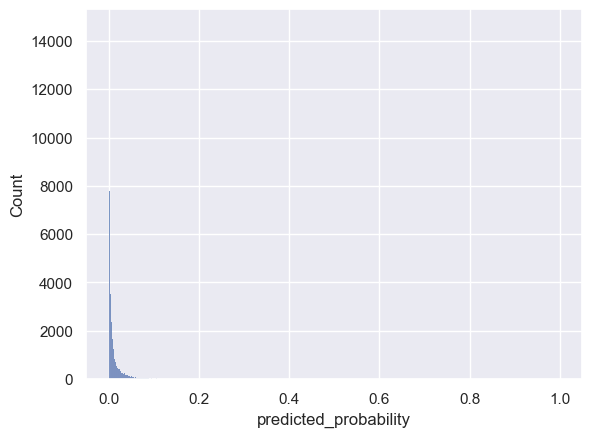

In [94]:
sns.histplot(predictions['predicted_probability'])

### company balance sheets

In [98]:
file_path = 'train.csv'  
new_df = pd.read_csv(file_path, index_col=0)
new_df.head()

,id,stmt_date,HQ_city,legal_struct,ateco_sector,def_date,fs_year,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,...,inc_extraord,taxes,profit,days_rec,ebitda,roa,roe,wc_net,margin_fin,cf_operations
17,520288,2011-12-31,28.0,SRL,14.0,NaT,2011,67537.0,1137566.0,1908.0,...,-309.0,-80959.0,-81288.0,NaN,6318.0,-3.81,-28.03,496258.0,-917029.0,-849.0
18,520288,2008-12-31,28.0,SRL,14.0,NaT,2008,256438.0,1181416.0,860.0,...,-678.0,-94622.0,-107382.0,NaN,46088.0,-2.76,NaN,97952.0,NaN,-3881.0
19,520288,2009-12-31,28.0,SRL,14.0,NaT,2009,194046.0,1152014.0,860.0,...,4224.0,-74235.0,-77819.0,NaN,67611.0,-2.17,NaN,-210671.0,NaN,32618.0
21,520288,2012-12-31,28.0,SRL,14.0,NaT,2012,15195.0,1116938.0,2023.0,...,3634.0,-250786.0,-250786.0,NaN,-161478.0,-12.99,NaN,367892.0,-1094962.0,-168907.0
22,520288,2007-12-31,28.0,SRL,14.0,NaT,2007,126603.0,1127807.0,620.0,...,820.0,92192.0,36733.0,NaN,153060.0,6.20,52.43,-317007.0,-1184970.0,80039.0


In [208]:
left_side_balance = [
    'asst_intang_fixed',
    'asst_tang_fixed',
    'asst_fixed_fin',
    'asst_current',
    'AR',
    'cash_and_equiv',
    'asst_tot',
    'goodwill'
]

In [183]:
right_side_balance = [
    'liab_lt',
    'liab_lt_emp', 
    'debt_bank_st',
    'debt_bank_lt',
    'debt_fin_st',
    'debt_fin_lt',
    'AP_st',
    'AP_lt',
    'debt_st',
    'debt_lt',
    'eqty_tot',
    'eqty_corp_family_tot',
]

In [168]:
good_example = new_df.loc[[786008]]

In [169]:
good_example['asst_tot'] 

786008    2320949.0
Name: asst_tot, dtype: float64

In [170]:
good_example[['asst_intang_fixed',
    'asst_tang_fixed',
    'asst_fixed_fin',
    # 'asst_current',
    'AR',
    'cash_and_equiv',]].sum(axis=1)

786008    2320949.0
dtype: float64

In [209]:
asset_cols = ['asst_intang_fixed',
    'asst_tang_fixed',
    'asst_fixed_fin',
    'AR',
    'cash_and_equiv',
             'goodwill']

# must be equal to 'asst_tot'

In [210]:
### left side total

ex_left_total = good_example[asset_cols].sum(axis=1)
ex_left_total

786008    2376869.0
dtype: float64

In [211]:
### right side

In [221]:
ex_right_total = good_example[['liab_lt',
    'liab_lt_emp', 
    'debt_bank_st',
    'debt_bank_lt',
    'debt_fin_st',
    'debt_fin_lt',
    'AP_st',
    'AP_lt',
    
    'eqty_tot',
    'eqty_corp_family_tot',
                               # 'debt_st',
    # 'debt_lt',
             ]].sum(axis=1)
ex_right_total

786008    2252557.0
dtype: float64

In [222]:
ex_left_total-ex_right_total

786008    124312.0
dtype: float64

In [223]:
good_example['debt_st']

786008    2056353.0
Name: debt_st, dtype: float64

In [224]:
good_example[['debt_bank_st','debt_fin_st','AP_st']].sum(axis=1)

786008    1997564.0
dtype: float64

In [228]:
2056353.0-1997564.0

58789.0

In [225]:
good_example[['debt_bank_lt','debt_fin_lt','AP_lt']].sum(axis=1)

786008    136961.0
dtype: float64

In [226]:
good_example['debt_lt']

786008    136961.0
Name: debt_lt, dtype: float64

In [184]:
good_example[right_side_balance]

,liab_lt,liab_lt_emp,debt_bank_st,debt_bank_lt,debt_fin_st,debt_fin_lt,AP_st,AP_lt,debt_st,debt_lt,eqty_tot,eqty_corp_family_tot
786008,0.0,0.0,1720233.0,136961.0,0.0,0.0,277331.0,0.0,2056353.0,136961.0,118032.0,NaN


In [186]:
good_example[left_side_balance]

,asst_intang_fixed,asst_tang_fixed,asst_fixed_fin,asst_current,AR,cash_and_equiv,asst_tot
786008,3849.0,92253.0,43170.0,2181677.0,2180436.0,1241.0,2320949.0


In [251]:
good_example[['debt_lt','debt_st','AP_lt','AP_st']].sum(axis=1)

786008    2470645.0
dtype: float64

In [252]:
good_example[['asst_tot']].sum(axis=1)

786008    2320949.0
dtype: float64

In [246]:
good_example[good_example.select_dtypes(['int','float']).columns[(good_example.select_dtypes(['int','float']) <= 58789.0).values[0]]].T

,786008
HQ_city,15.00
ateco_sector,68.00
fs_year,2009.00
asst_intang_fixed,3849.00
asst_fixed_fin,43170.00
cash_and_equiv,1241.00
liab_lt,0.00
liab_lt_emp,0.00
debt_fin_st,0.00
debt_fin_lt,0.00
